# STUDENT MARKS REGRESSION

<img src="https://storage.googleapis.com/kaggle-datasets-images/1839803/3003315/4f5cfcdd6e1f86e75abbb17ca7a272f5/dataset-cover.jpg?t=2022-01-04-11-10-48">

<a href="https://www.kaggle.com/datasets/yasserh/student-marks-dataset" target="_blank">Data burada</a>

* Bu projede "Marks" dataset üzerinden  öğrencilerin notlarını etkileyen faktörleri analiz edeceğiz, farklı regression algoritmaları kullanıp diğer sutunların sağladığı bilgiye dayanarak  öğrencilerin not performansını tahmin edeceğiz.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Marks.csv")

In [3]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [4]:
df.shape

(100, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [8]:
# Sadece saat kısmını alma ve int olarak saklamak istedim, çünkü sutun onbj. görünüyordu, dakikayı koruyacak bir fonksiyon çalışmadı.
df['time_study'] = df['time_study'].apply(lambda x: int(x))

In [9]:
df.head()

,number_courses,time_study,Marks
0,3,4,19.202
1,4,0,7.734
2,4,3,13.811
3,6,7,53.018
4,8,7,55.299


In [10]:
# Students marks sutununa bakınca buradaki notları en yakın oluğa yıvarlamak istedim.
df['Marks'] = df['Marks'].apply(lambda x: round(x, -1))

In [11]:
df.head()

,number_courses,time_study,Marks
0,3,4,20.0
1,4,0,10.0
2,4,3,10.0
3,6,7,50.0
4,8,7,60.0


In [13]:
df.info()  # böylece datam çok temiz göründü

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    int64  
 2   Marks           100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


### Data Visualization

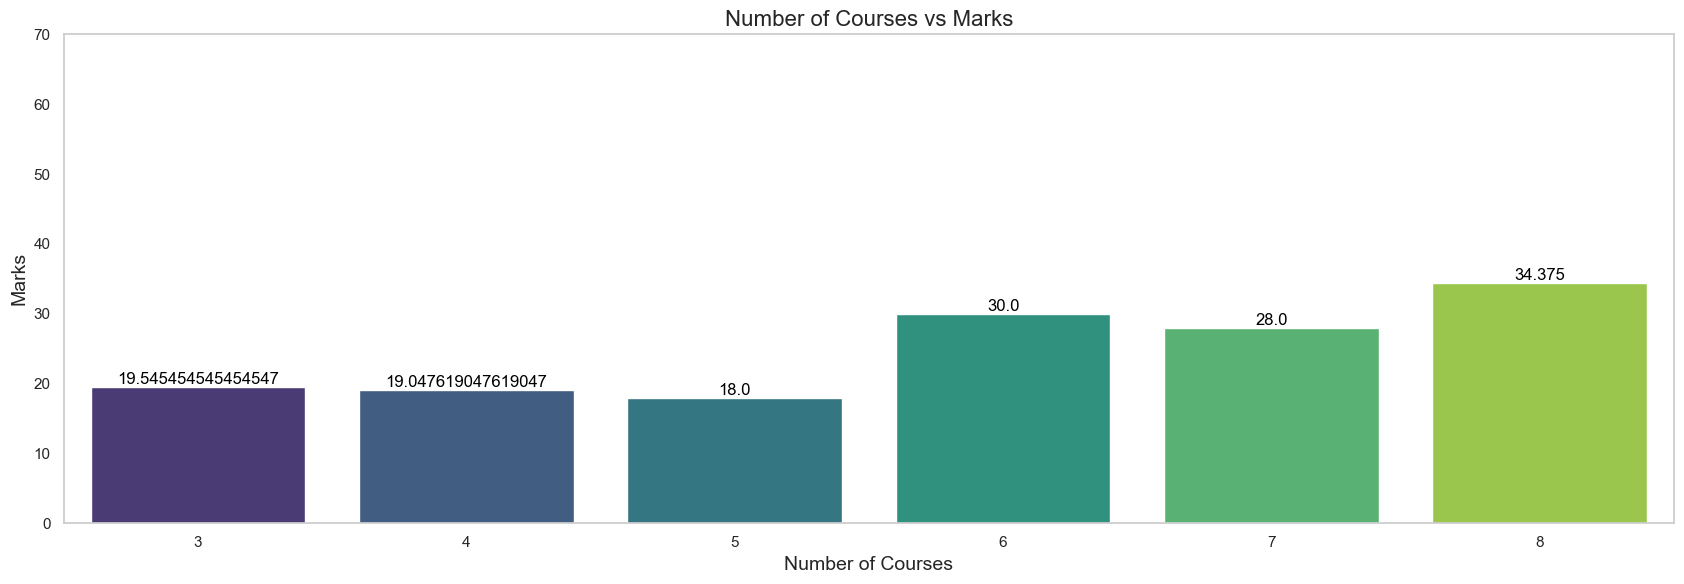

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(17, 6)) # grafiği oluşturma
bar_plot = sns.barplot(data=df, x='number_courses', y='Marks', palette='viridis', ci=None)
plt.title('Number of Courses vs Marks', fontsize=16) # başlıklar
plt.xlabel('Number of Courses', fontsize=14)
plt.ylabel('Marks', fontsize=14)
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=12, color='black', rotation=0)
plt.ylim(0, 70)  # Y eksenini ayarlama
plt.grid(axis='y')
plt.tight_layout()
plt.show()

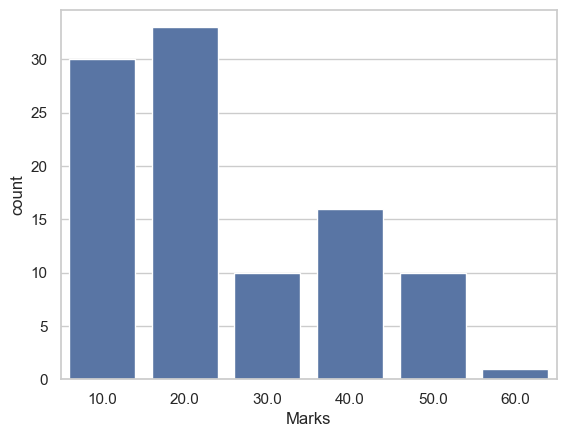

In [25]:
sns.countplot(x=df['Marks']); # öğrenciler çok başarısız,çoğu 10 ve 20 almış. 60 alan bile çok az. 100 hiç yok

In [22]:
df.corr(numeric_only=True)

,number_courses,time_study,Marks
number_courses,1.000000,0.188484,0.405041
time_study,0.188484,1.000000,0.914044
Marks,0.405041,0.914044,1.000000


In [23]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,3.570000,24.600000
std,1.799523,2.366667,13.811136
min,3.000000,0.000000,10.000000
25%,4.000000,2.000000,10.000000
50%,5.000000,3.500000,20.000000
75%,7.000000,6.000000,40.000000
max,8.000000,7.000000,60.000000


<Axes: >

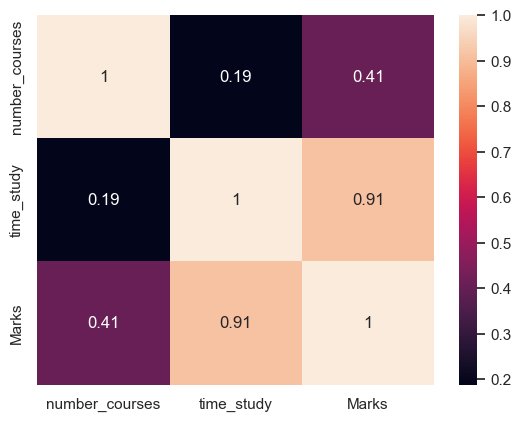

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* Burada **Number course** ile **Marks** arasında pozitif corelasyon var ama çok güçlü değil. Asıl güçlü corelasyon **time study** ile **marks** sutunu arasında yani bariz bir şekilde çalışma süresi arttıkça puanlarda artıyor.

<Axes: xlabel='Marks', ylabel='Count'>

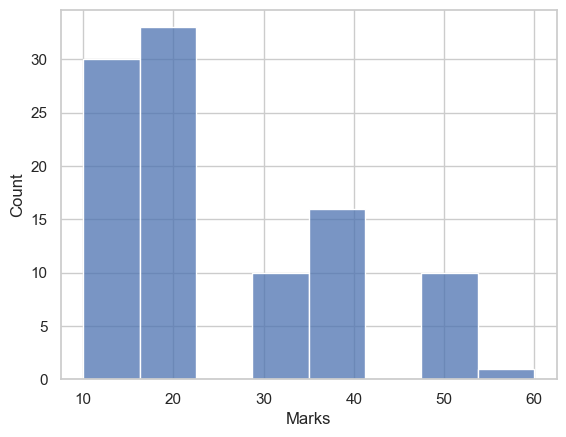

In [26]:
sns.histplot(x=df['Marks']) 

<Axes: xlabel='Marks', ylabel='Density'>

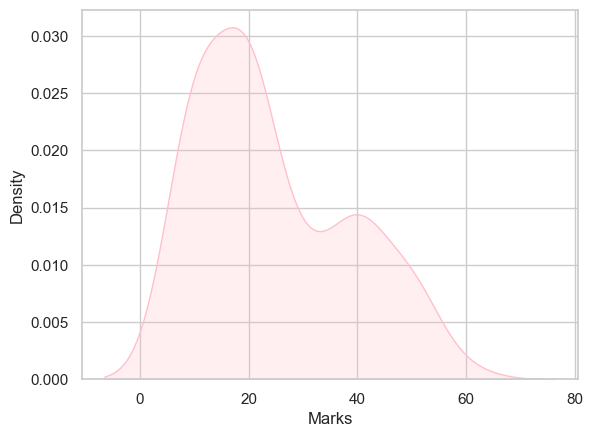

In [27]:
sns.kdeplot(x=df['Marks'], fill=True,color='pink')  # marks sutununu KDE görselini yapalım, veri ortada gibi, bu iyi.

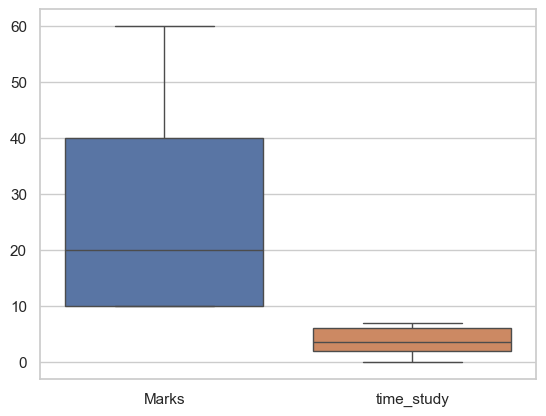

In [28]:
sns.boxplot([df['Marks'],df['time_study']]);
# 40 tan sonraki notla outlier, time study de ortalama 3 puandı zaten, maximum da 7 di.

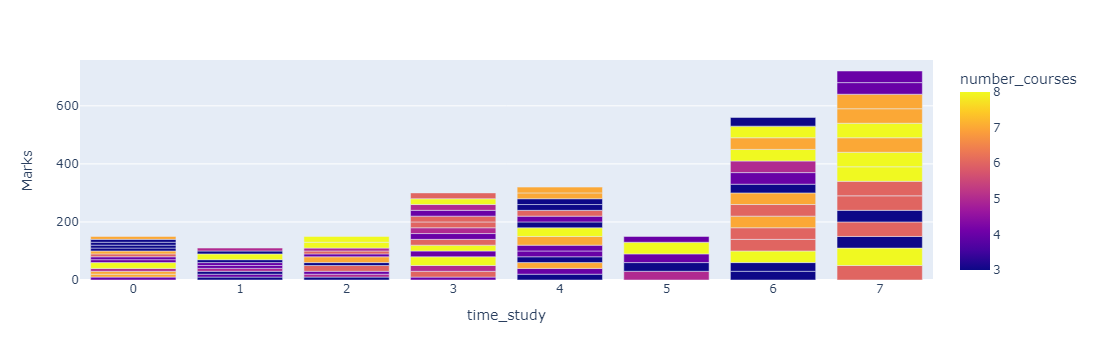

In [33]:
px.bar(df,x='time_study',y='Marks', color='number_courses')
# Bu canlı grafik çok iyi oldu
# Mesela biri hiç çalışmamış, 8 ders almış ve 20 puan almış, büyük başarı, kopya çekmiş olabilir, yani büyük ihtimal veya dahi biridir.

### Modelling

In [35]:
x=df[['time_study','number_courses']]
y=df[['Marks']]

In [36]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [37]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.956219,3.367398,1.950597
XGBRegressor,0.945835,3.745506,1.919209
Extra Tree,0.944766,3.782269,1.916667
Decision Tree,0.944766,3.782269,1.916667
AdaBoost,0.942085,3.872983,2.700000
KNeighborsRegressor,0.931090,4.224652,2.332651
Linear,0.863585,5.944030,4.725344
Ridge,0.862927,5.958353,4.736495
SGD,0.854998,6.128255,4.830143
Lasso,0.850341,6.225886,4.941794


* Düşük RMSE ve MAE , yüksekR2 ile model %95 başarılı oldu. En yüksek değer GradientBoostin iken  XGBR ve EktraTree de yüksek performans gösterdi.

#### Sonuç Grafiği

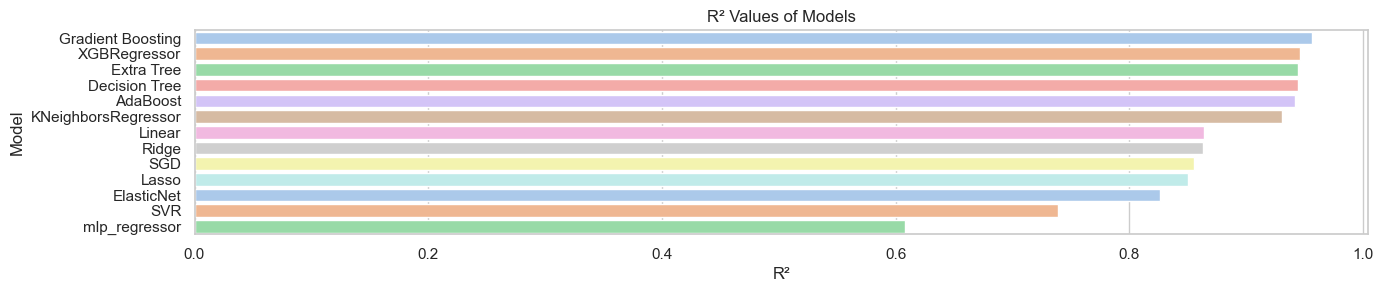

In [43]:
results_df = pd.DataFrame(data)
plt.figure(figsize=(14, 8))# Grafik oluşturma
# R^2 grafiği
plt.subplot(3, 1, 1)
sns.barplot(x='R_Squared', y='Model', data=results_df, palette='pastel')
plt.title('R² Values of Models')
plt.xlabel('R²')
plt.ylabel('Model')
plt.tight_layout()
plt.show()